### 1. Data Preprocessing

In [2]:
# 1. Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv(r"C:\Users\igho\Desktop\10\Repositories by Me\Terrano E-Mart Product Dataset Unsupervised ML python\product_dataset.csv") 

In [3]:
# Display the first few rows
print("Data Overview:\n", data.head(), "\n")

Data Overview:
          Price       Length        Width       Height     Weight  \
0  1813.686374  3101.476754  1794.462898  2141.098003  41.159407   
1     8.305800     1.712087     1.217530     1.316786   0.020536   
2     3.974055     0.854370     0.783536     0.160095   0.019248   
3   608.063853   317.814318   593.172830   319.939460  21.538341   
4     8.479075     2.230387     2.210731     0.632546   0.036980   

         Category  
0       Furniture  
1  Everyday Items  
2  Everyday Items  
3       Furniture  
4  Everyday Items   



In [4]:
# Data Information
print("Data Info:\n", data.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1500 non-null   float64
 1   Length    1500 non-null   float64
 2   Width     1500 non-null   float64
 3   Height    1500 non-null   float64
 4   Weight    1500 non-null   float64
 5   Category  1500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 70.4+ KB
Data Info:
 None 



This DataFrame contains 1500 entries (rows), indexed from 0 to 1499. It has 6 Columns:
   - Price (float64)
   - Length (float64)
   - Width (float64)
   - Height (float64)
   - Weight (float64)
   - Category (object)

Data types: 5 columns are float, and 1 column (Category) is object type (strings).

All columns have 1500 non-null values, meaning there are no missing values in the dataset.

This DataFrame contains information about some products, including their dimensions (length, width, height), weight, price, and category. The data is complete with no missing values.

In [6]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum(), "\n")

Missing Values:
 Price       0
Length      0
Width       0
Height      0
Weight      0
Category    0
dtype: int64 



In [7]:
# Convert categorical columns to numeric (if necessary)
data['Category'] = data['Category'].astype('category').cat.codes

# Log transformation for highly skewed data
for column in ['Price', 'Weight', 'Length', 'Width', 'Height']:
    data[f'{column}_log'] = np.log1p(data[column])  # Use log1p to avoid log(0)

# Feature scaling
scaler = MinMaxScaler()
scaled_columns = ['Price', 'Weight', 'Length', 'Width', 'Height']
data[[f'{col}_scaled' for col in scaled_columns]] = scaler.fit_transform(data[scaled_columns])

# Check the DataFrame to confirm scaled columns are created
print("Scaled Columns in DataFrame:")
print(data.head())  # Display the first few rows to check if scaled columns exist

Scaled Columns in DataFrame:
         Price       Length        Width       Height     Weight  Category  \
0  1813.686374  3101.476754  1794.462898  2141.098003  41.159407         2   
1     8.305800     1.712087     1.217530     1.316786   0.020536         1   
2     3.974055     0.854370     0.783536     0.160095   0.019248         1   
3   608.063853   317.814318   593.172830   319.939460  21.538341         2   
4     8.479075     2.230387     2.210731     0.632546   0.036980         1   

   Price_log  Weight_log  Length_log  Width_log  Height_log  Price_scaled  \
0   7.503668    3.741458    8.039956   7.493018    7.669541      0.910114   
1   2.230638    0.020328    0.997719   0.796394    0.840181      0.003598   
2   1.604235    0.019065    0.617545   0.578598    0.148502      0.001423   
3   6.411923    3.115218    5.764609   6.387170    5.771253      0.304748   
4   2.249087    0.036312    1.172602   1.166498    0.490141      0.003685   

   Weight_scaled  Length_scaled  Width_

### 2. Exploratory Data Analysis (EDA)

<Figure size 1200x800 with 0 Axes>

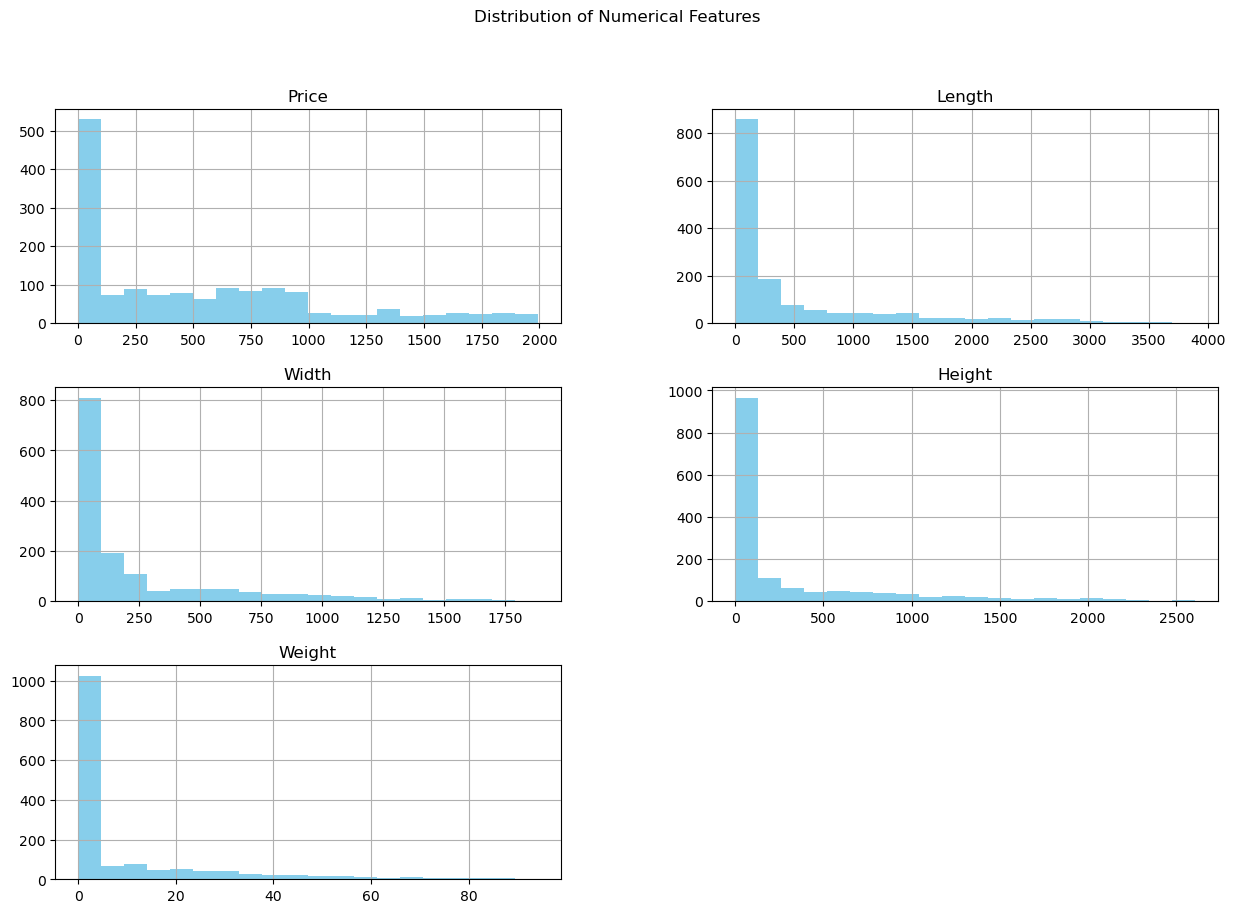

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis - Distribution of numerical features
plt.figure(figsize=(12, 8))
data[['Price', 'Length', 'Width', 'Height', 'Weight']].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

All features show right-skewed distributions, indicating the presence of some outliers.
The majority of items in the dataset seem to be relatively small and light, with a few larger, heavier, or more expensive items.
The skewed nature of these distributions explains why log transformations and different scaling methods were applied in the previous data frame, as these techniques can help normalize such skewed data for analysis or modeling.

This distribution suggests the dataset might be dealing with a variety of products, perhaps including both small, inexpensive items and some larger, more premium products. The skewed nature of the data would likely require careful consideration in any statistical analysis or machine learning application

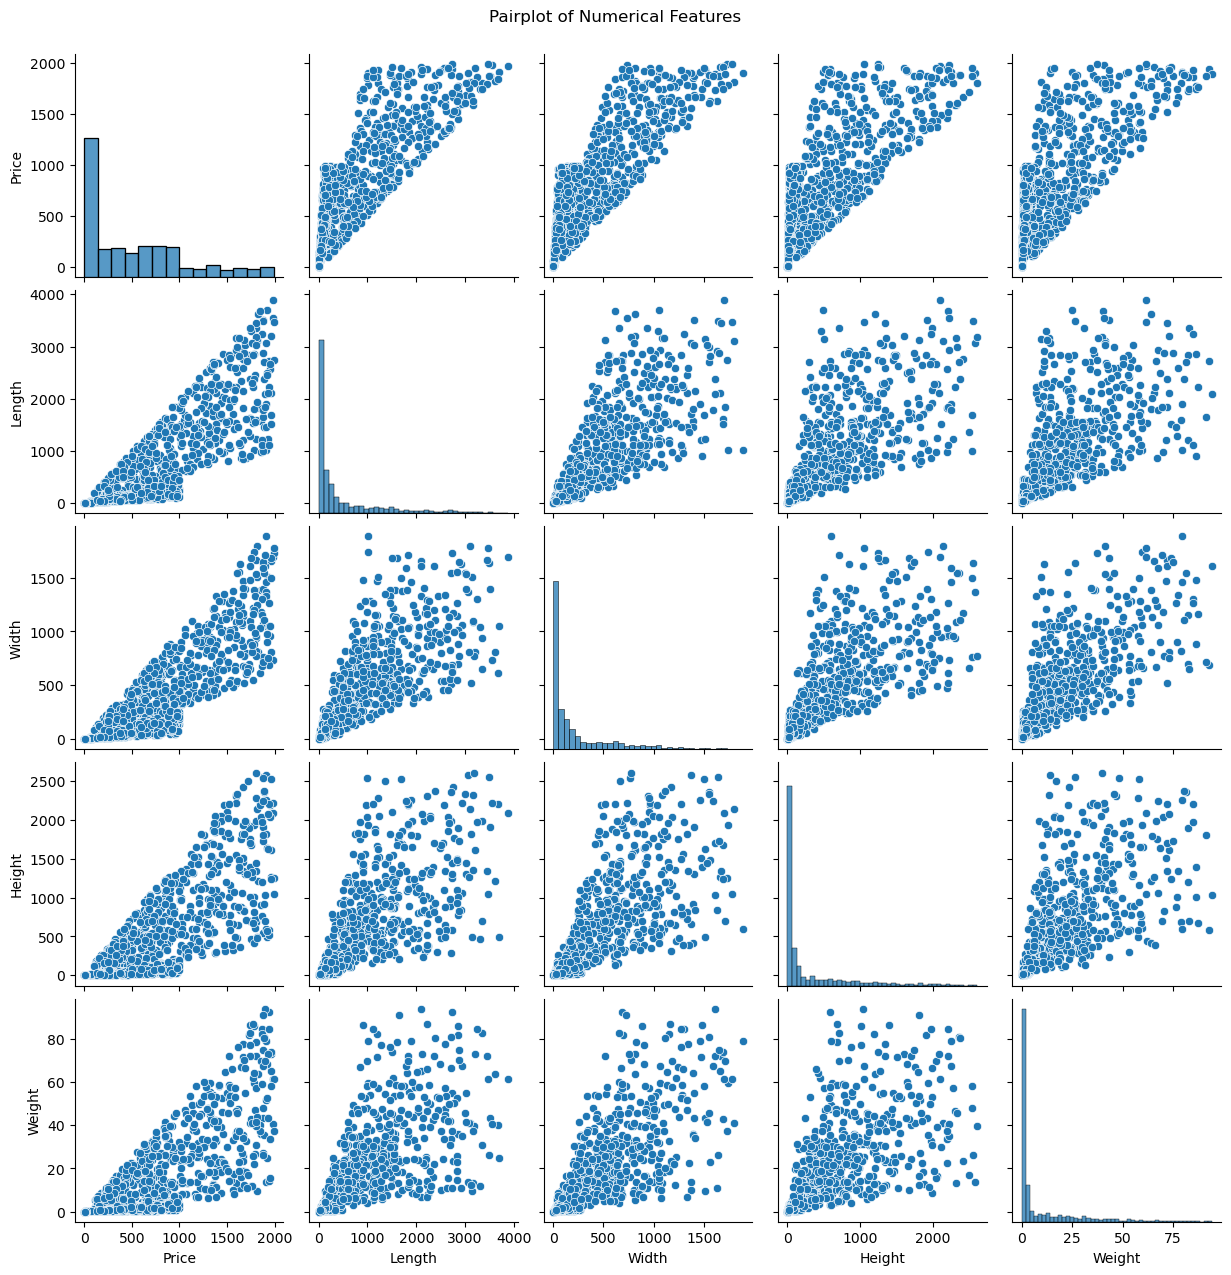

In [11]:
# Bivariate Analysis - Pairplot
sns.pairplot(data[['Price', 'Length', 'Width', 'Height', 'Weight']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

Above is a pairplot of numerical features in the dataset.

1. Diagonal plots (histograms):
   - Confirm the right-skewed distributions for all features (Price, Length, Width, Height, Weight) as seen in the previous histogram image.

2. Scatter plots (off-diagonal):
   - Price vs other features: Shows positive correlations with all other features. As dimensions or weight increase, price tends to increase.
   - Length, Width, Height: Strong positive correlations among these dimensions. This suggests that larger items tend to be larger in all dimensions.
   - Weight vs dimensions: Positive correlations, indicating heavier items tend to be larger.

3. Specific relationships:
   - Price vs Length/Width/Height: Roughly linear relationship with some spread, suggesting size is a factor in pricing but not the only determinant.
   - Price vs Weight: Strong positive correlation, with a more defined relationship than with dimensions.
   - Length vs Width: Very strong positive correlation, almost linear, suggesting items tend to maintain certain proportions.
   - Height vs Length/Width: Positive correlation but more scattered, indicating more variability in height relative to other dimensions.

4. Data clusters:
   - There appear to be some distinct clusters or groups of data points in several plots, particularly visible in the dimension relationships. This might indicate different categories or types of items in the dataset.

5. Outliers:
   - Visible in most plots, particularly for higher values of each feature. These could represent premium or unusually large/heavy items.

6. Non-linear relationships:
   - Some relationships (e.g., Price vs Weight) show slight curvature, suggesting potential non-linear relationships that might benefit from transformation for analysis.

Overall, this pairplot reveals strong interrelationships among all features, with size and weight being key factors related to price. The presence of clusters and outliers suggests a diverse range of items in the dataset, possibly spanning different categories or types of products. 

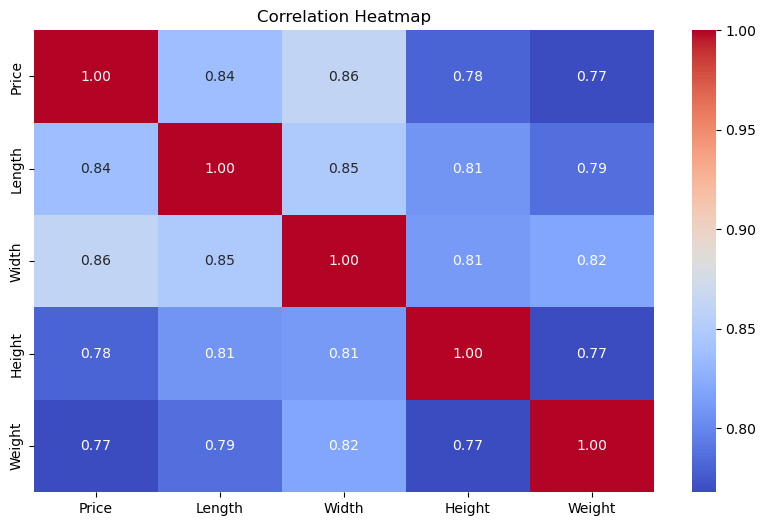

In [13]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Price', 'Length', 'Width', 'Height', 'Weight']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Above is a correlation heatmap for the numerical features in the dataset.

1. Overall correlation strength:
   - All features show strong positive correlations with each other, with values ranging from 0.77 to 0.86.
   - This indicates that as one feature increases, the others tend to increase as well.

2. Price correlations:
   - Price is most strongly correlated with Width (0.86) and Length (0.84).
   - It has slightly lower correlations with Height (0.78) and Weight (0.77).
   - This suggests that the size of an item, particularly its width and length, has a strong influence on its price.

3. Dimensional correlations:
   - Length, Width, and Height are all strongly correlated with each other (0.81 to 0.85).
   - This indicates that items tend to increase in all dimensions proportionally.
   - Width has the strongest correlation with the other dimensions.

4. Weight correlations:
   - Weight is most strongly correlated with Width (0.82).
   - It has slightly lower correlations with Length (0.79), Height (0.77), and Price (0.77).
   - This suggests that while weight is related to all other features, it's most closely tied to the width of an item.

5. Strongest correlations:
   - Price and Width (0.86)
   - Price and Length (0.84)
   - Length and Width (0.85)

6. Weakest correlations (though still strong):
   - Price and Weight (0.77)
   - Height and Weight (0.77)

Key insights:
- The strong correlations across all features indicate that these characteristics are closely interrelated in this dataset.
- Width seems to be a particularly important feature, having strong correlations with all other features.
- The strong correlation between price and dimensions suggests that size is a key factor in determining the price of items in this dataset.
- While all correlations are strong, the slightly lower correlations with weight might indicate some variability in the density or material of the items.

### 3. Label Encoding

In [16]:
# 3. Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Category_'] = encoder.fit_transform(data['Category'])

# Drop 'Category' and 'Category_' from the features
features = data.drop(['Category', 'Category_'], axis=1)


In [17]:
data

,Price,Length,Width,Height,Weight,Category,Price_log,Weight_log,Length_log,Width_log,Height_log,Price_scaled,Weight_scaled,Length_scaled,Width_scaled,Height_scaled,Category_
0,1813.686374,3101.476754,1794.462898,2141.098003,41.159407,2,7.503668,3.741458,8.039956,7.493018,7.669541,0.910114,0.437326,0.797578,0.953136,0.822260,2
1,8.305800,1.712087,1.217530,1.316786,0.020536,1,2.230638,0.020328,0.997719,0.796394,0.840181,0.003598,0.000215,0.000408,0.000622,0.000498,1
2,3.974055,0.854370,0.783536,0.160095,0.019248,1,1.604235,0.019065,0.617545,0.578598,0.148502,0.001423,0.000202,0.000188,0.000392,0.000054,1
3,608.063853,317.814318,593.172830,319.939460,21.538341,2,6.411923,3.115218,5.764609,6.387170,5.771253,0.304748,0.228847,0.081701,0.315050,0.122862,2
4,8.479075,2.230387,2.210731,0.632546,0.036980,1,2.249087,0.036312,1.172602,1.166498,0.490141,0.003685,0.000390,0.000541,0.001150,0.000235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,210.488310,44.504835,19.839075,7.570519,0.219510,0,5.354170,0.198449,3.817819,3.036830,2.148328,0.105118,0.002329,0.011413,0.010514,0.002900,0
1496,1896.924434,1838.839322,1709.042640,704.125023,69.668042,2,7.548516,4.257993,7.517434,7.444274,6.558375,0.951909,0.740237,0.472864,0.907763,0.270405,2
1497,639.950162,597.363262,360.892055,455.207347,18.881723,2,6.462952,2.989801,6.394198,5.891346,6.122947,0.320759,0.200620,0.153592,0.191670,0.174810,2
1498,1509.757686,2289.675652,719.581184,2015.460219,19.020880,2,7.320367,2.996776,7.736602,6.580058,7.609099,0.757506,0.202099,0.588806,0.382194,0.774010,2


In [18]:
features

,Price,Length,Width,Height,Weight,Price_log,Weight_log,Length_log,Width_log,Height_log,Price_scaled,Weight_scaled,Length_scaled,Width_scaled,Height_scaled
0,1813.686374,3101.476754,1794.462898,2141.098003,41.159407,7.503668,3.741458,8.039956,7.493018,7.669541,0.910114,0.437326,0.797578,0.953136,0.822260
1,8.305800,1.712087,1.217530,1.316786,0.020536,2.230638,0.020328,0.997719,0.796394,0.840181,0.003598,0.000215,0.000408,0.000622,0.000498
2,3.974055,0.854370,0.783536,0.160095,0.019248,1.604235,0.019065,0.617545,0.578598,0.148502,0.001423,0.000202,0.000188,0.000392,0.000054
3,608.063853,317.814318,593.172830,319.939460,21.538341,6.411923,3.115218,5.764609,6.387170,5.771253,0.304748,0.228847,0.081701,0.315050,0.122862
4,8.479075,2.230387,2.210731,0.632546,0.036980,2.249087,0.036312,1.172602,1.166498,0.490141,0.003685,0.000390,0.000541,0.001150,0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,210.488310,44.504835,19.839075,7.570519,0.219510,5.354170,0.198449,3.817819,3.036830,2.148328,0.105118,0.002329,0.011413,0.010514,0.002900
1496,1896.924434,1838.839322,1709.042640,704.125023,69.668042,7.548516,4.257993,7.517434,7.444274,6.558375,0.951909,0.740237,0.472864,0.907763,0.270405
1497,639.950162,597.363262,360.892055,455.207347,18.881723,6.462952,2.989801,6.394198,5.891346,6.122947,0.320759,0.200620,0.153592,0.191670,0.174810
1498,1509.757686,2289.675652,719.581184,2015.460219,19.020880,7.320367,2.996776,7.736602,6.580058,7.609099,0.757506,0.202099,0.588806,0.382194,0.774010


### 4. Feature Scaling

In [20]:
# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### 5. K-Means Clustering and Elbow Method

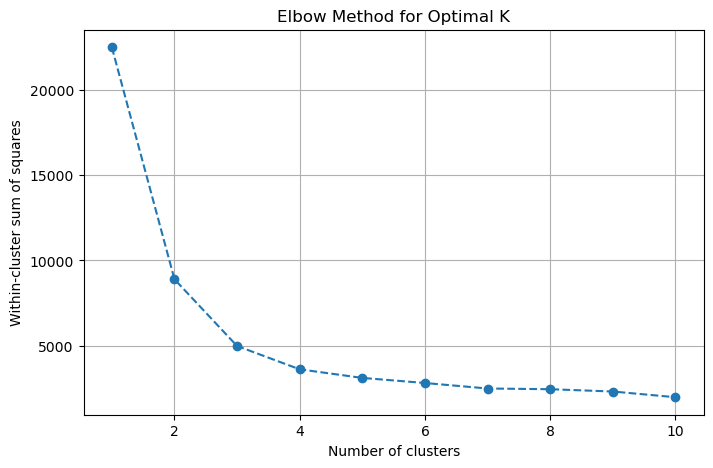

In [22]:
# 5. K-Means Clustering and Elbow Method
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    model = KMeans(random_state=42, n_clusters=i)
    model.fit(scaled_features)
    wcss.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


The above graph shows the Elbow Method for determining the optimal number of clusters (K) in a K-means clustering algorithm. Here's an interpretation of the plot:

1. Purpose: The Elbow Method is used to find the appropriate number of clusters in K-means clustering by plotting the within-cluster sum of squares (WCSS) against the number of clusters.

2. X-axis: Represents the number of clusters (K), ranging from 1 to 10.

3. Y-axis: Shows the within-cluster sum of squares (WCSS), which measures the compactness of the clusters. Lower values indicate tighter, more defined clusters.

4. Curve shape: The graph shows a sharp decrease in WCSS as the number of clusters increases from 1 to 3, followed by a more gradual decrease thereafter.

5. Elbow point: The "elbow" of the curve appears to be around K=3 or K=4. This is where the rate of decrease in WCSS starts to level off.

6. Interpretation:
   - The optimal number of clusters is typically chosen at the elbow point, where adding more clusters doesn't significantly reduce the WCSS.
   - In this case, 3 or 4 clusters could be considered optimal.
   - Choosing 3 clusters would prioritize simplicity, while 4 clusters might capture slightly more nuanced groupings in the data.

7. Trade-offs:
   - Fewer clusters (e.g., K=3) result in a simpler model but might oversimplify the data structure.
   - More clusters (e.g., K=4 or 5) might capture more subtle patterns but risk overfitting or creating unnecessarily complex groupings.

### 7. Assign Predicted Categories

In [25]:
# Applying K-Means with 3 clusters (k=3)
k = 3
model = KMeans(random_state=42, n_clusters=k)

# Apply K-Means algorithm to the scaled features
model.fit(scaled_features)

# Updated category_labels for 3 clusters
category_labels = {
    0: 'Electronics',
    1: 'Everyday Items',
    2: 'Furniture'
}

# Assign predicted categories based on K-Means labels
data['Predicted Category'] = [category_labels.get(label, 'Other') for label in model.labels_]

# Display the final DataFrame with predicted categories
print(data[['Price', 'Length', 'Width', 'Height', 'Weight', 'Category', 'Predicted Category']].head())

         Price       Length        Width       Height     Weight  Category  \
0  1813.686374  3101.476754  1794.462898  2141.098003  41.159407         2   
1     8.305800     1.712087     1.217530     1.316786   0.020536         1   
2     3.974055     0.854370     0.783536     0.160095   0.019248         1   
3   608.063853   317.814318   593.172830   319.939460  21.538341         2   
4     8.479075     2.230387     2.210731     0.632546   0.036980         1   

  Predicted Category  
0        Electronics  
1          Furniture  
2          Furniture  
3     Everyday Items  
4          Furniture  


### 8. Visualizing Clusters with Category Names

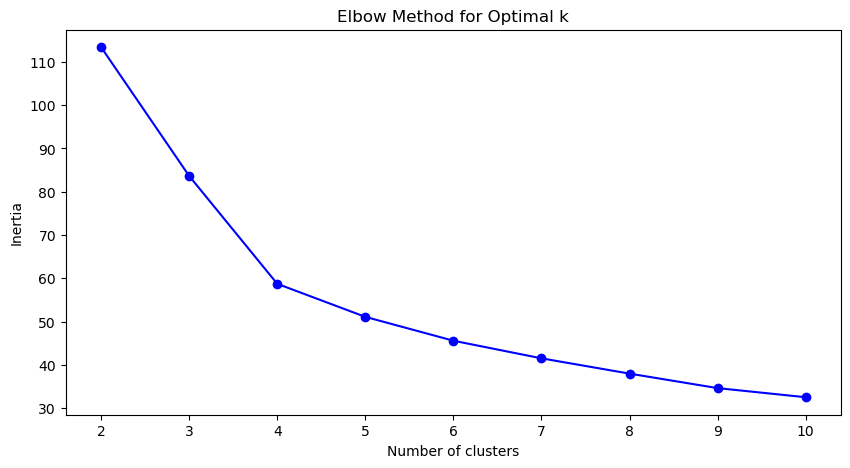

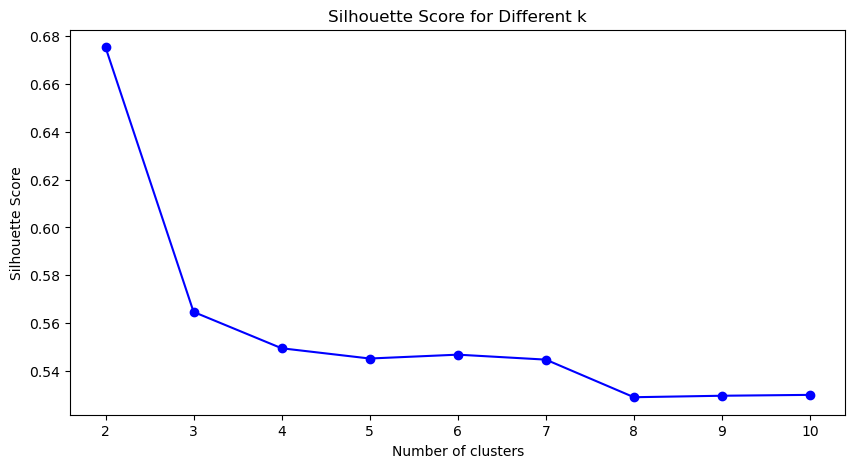

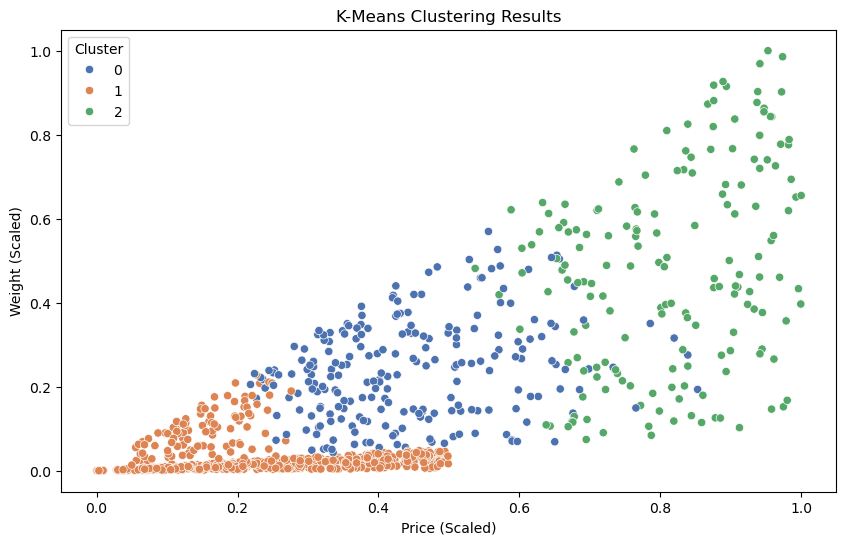

In [27]:
# 8. Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[[f'{col}_scaled' for col in scaled_columns]])  # Use scaled columns
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[[f'{col}_scaled' for col in scaled_columns]], kmeans.labels_))

# Plotting the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

# Fit KMeans with the chosen number of clusters
optimal_k = 3  # Set this based on the Elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[[f'{col}_scaled' for col in scaled_columns]])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_scaled', y='Weight_scaled', hue='KMeans_Cluster', data=data, palette='deep')
plt.title('K-Means Clustering Results')
plt.xlabel('Price (Scaled)')
plt.ylabel('Weight (Scaled)')
plt.legend(title='Cluster')
plt.show()



The silhouette score for different k graph shows the Silhouette Score for different numbers of clusters (k) in a clustering algorithm.

1. Purpose: The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It's used to evaluate the quality of clustering.

2. X-axis: Represents the number of clusters (k), ranging from 2 to 10.

3. Y-axis: Shows the Silhouette Score, which ranges from -1 to 1. Higher scores indicate better-defined clusters.

4. Curve shape: The graph shows a sharp decrease in the Silhouette Score as k increases from 2 to 3, followed by a more gradual decrease and some fluctuations for larger k values.

5. Interpretation:
   - The highest Silhouette Score is at k=2, suggesting that two clusters provide the best separation between clusters.
   - There's a significant drop in score from k=2 to k=3, indicating that the quality of clustering decreases notably when moving from 2 to 3 clusters.
   - After k=3, the scores remain relatively stable with slight fluctuations, suggesting that increasing the number of clusters beyond 3 doesn't significantly improve cluster quality.

6. Trade-offs:
   - While k=2 has the highest score, it may oversimplify the data structure.
   - The relatively stable scores for k≥3 suggest that the data might have more complex patterns that aren't captured well by a simple two-cluster solution.

7. Additional considerations:
   - The overall Silhouette Scores (between 0.53 and 0.68) indicate reasonably good clustering quality across different k values.
   - The choice of optimal k should balance the Silhouette Score with other factors like interpretability and practical usefulness of the clustering solution.

Conclusion:
Based solely on the Silhouette Score, 2 clusters would be optimal. However, given the significant drop to 3 clusters and the relative stability thereafter, it might be worth considering 3 or 4 clusters as well. 

### 9. Model Evaluation and Classification Reports

In [30]:
# 9. Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Assume true categories are available in the 'Category_' column
true_categories = data['Category_']  # Actual category labels
predicted_categories = data['KMeans_Cluster']  # Predicted cluster labels

# Generate classification report
print(classification_report(true_categories, predicted_categories))
print(confusion_matrix(true_categories, predicted_categories))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.45      1.00      0.62       500
           2       1.00      0.34      0.51       500

    accuracy                           0.45      1500
   macro avg       0.49      0.45      0.38      1500
weighted avg       0.49      0.45      0.38      1500

[[  1 499   0]
 [  0 500   0]
 [226 102 172]]


Above is the performance metrics of a multi-class classification model.

1. Per-class metrics:
   - Class 0: Precision = 0.00, Recall = 0.00, F1-score = 0.00, Support = 500
   - Class 1: Precision = 0.45, Recall = 1.00, F1-score = 0.62, Support = 500
   - Class 2: Precision = 1.00, Recall = 0.34, F1-score = 0.51, Support = 500

2. Overall metrics:
   - Accuracy: 0.45
   - Macro avg: Precision = 0.49, Recall = 0.45, F1-score = 0.38
   - Weighted avg: Precision = 0.49, Recall = 0.45, F1-score = 0.38

3. Confusion matrix:
   [[ 1 499   0]
    [ 0 500   0]
    [226 102 172]]

Interpretation:
1. Class 0 is not being predicted at all (all metrics are 0).
2. Class 1 has perfect recall but low precision, indicating the model is overpredicting this class.
3. Class 2 has perfect precision but low recall, suggesting the model is underpredicting this class.
4. The overall accuracy is 0.45, which is relatively low for a 3-class problem.
5. The confusion matrix shows:
   - Almost all Class 0 instances are misclassified as Class 1.
   - All Class 1 instances are correctly classified.
   - Class 2 instances are split between correct classification and misclassification as Class 1.

In summary, this model has significant issues:
- It's failing completely for Class 0.
- It's overpredicting Class 1.
- It's underpredicting Class 2.
- The overall performance is poor, with an accuracy of only 45%.

This model needs substantial improvement, and so, i will be performing hyperparameter tuning.

### 10. Hyperparameter Tuning for K-Means:

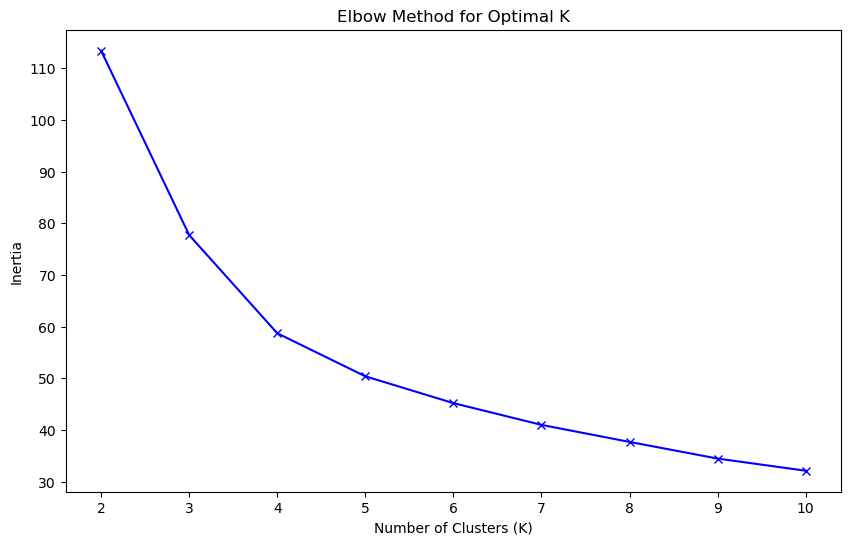

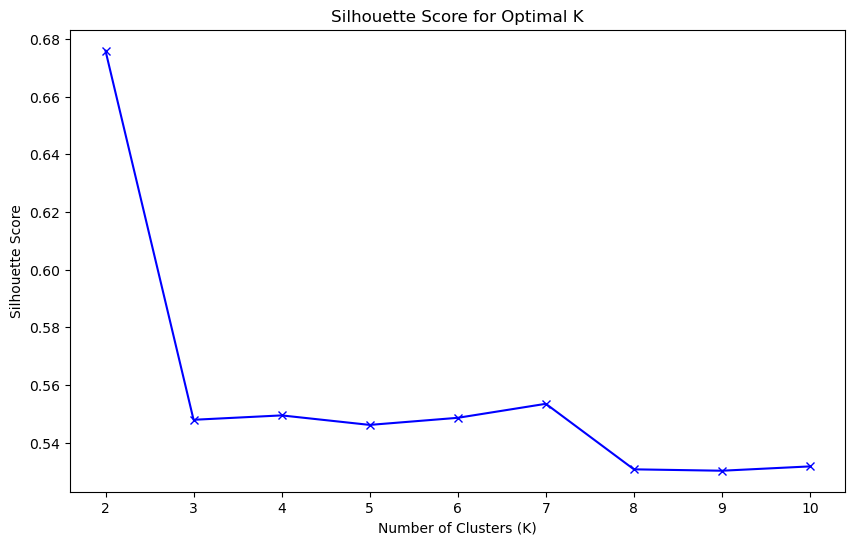

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of values to test for K
K = range(2, 11)
inertia = []
silhouette_scores = []

# Iterate over K to find the optimal number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data[['Price_scaled', 'Weight_scaled', 'Length_scaled', 'Width_scaled', 'Height_scaled']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[['Price_scaled', 'Weight_scaled', 'Length_scaled', 'Width_scaled', 'Height_scaled']], kmeans.labels_))

# Plot the Elbow Method (inertia)
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


Above  graph shows the Silhouette Score for different numbers of clusters (K) 
1. Purpose: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher scores indicating better-defined clusters.

2. X-axis: Represents the number of clusters (K), ranging from 2 to 10.

3. Y-axis: Shows the Silhouette Score, with values between approximately 0.53 and 0.675.

4. Curve shape: 
   - There's a sharp decrease in the Silhouette Score from K=2 to K=3.
   - After K=3, the scores remain relatively stable with slight fluctuations.

5. Key observations:
   - The highest Silhouette Score is at K=2, suggesting that two clusters provide the best separation.
   - There's a significant drop in score from K=2 to K=3.
   - For K≥3, the scores remain in a narrow range (approximately 0.53 to 0.55).

6. Interpretation:
   - While K=2 has the highest score, it may oversimplify the data structure.
   - The relatively stable scores for K≥3 suggest that the data might have more complex patterns that aren't captured well by a simple two-cluster solution.
   - The small variations in scores for K≥3 indicate that increasing the number of clusters beyond 3 doesn't significantly improve cluster quality.

7. Considerations:
   - The overall Silhouette Scores (between 0.53 and 0.675) indicate reasonably good clustering quality across different K values.
   - The choice of optimal K should balance the Silhouette Score with other factors like interpretability and practical usefulness of the clustering solution.

Conclusion:
Based solely on the Silhouette Score, 2 clusters would be optimal. However, given the significant drop to 3 clusters and the relative stability thereafter, it might be worth considering 3 or 4 clusters as well. 

### 11. Trying Agglomerative Clustering:

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data[['Price_scaled', 'Weight_scaled', 'Length_scaled', 'Width_scaled', 'Height_scaled']])

# Evaluate using Silhouette Score
agg_silhouette = silhouette_score(data[['Price_scaled', 'Weight_scaled', 'Length_scaled', 'Width_scaled', 'Height_scaled']], agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette}')


Silhouette Score for Agglomerative Clustering: 0.531456746770187


### 12. Cross-Validation for K-Means:

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store silhouette scores
silhouette_scores = []

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Price', 'Weight', 'Length', 'Width', 'Height']])

# K-Fold Cross Validation for K-Means
for train_index, test_index in kf.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    
    # Fit K-Means on training set
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)
    
    # Predict cluster labels for the test set
    labels = kmeans.predict(X_test)
    
    # Calculate silhouette score for this fold
    score = silhouette_score(X_test, labels)
    silhouette_scores.append(score)

# Average silhouette score across all folds
avg_silhouette_score = np.mean(silhouette_scores)

# Print the result (use this instead of st.write for non-Streamlit environments)
print(f"Average Silhouette Score across 5-folds: {avg_silhouette_score}")


Average Silhouette Score across 5-folds: 0.5865266667393711


### 13. Save The Model

In [38]:
import pickle
from sklearn.cluster import KMeans

# Train the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Save the trained model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

print("Model saved successfully!")


Model saved successfully!
